In [0]:
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.utils import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-20m.zip

File ‘ml-20m.zip’ already there; not retrieving.



In [19]:
!unzip -n ml-20m.zip

Archive:  ml-20m.zip


In [20]:
!ls

ml-20m	ml-20m.zip  sample_data


In [0]:
df = pd.read_csv("ml-20m/ratings.csv")

In [22]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [0]:
df.userId = pd.Categorical(df.userId)
df["new_user_id"] = df.userId.cat.codes

In [0]:
df.movieId = pd.Categorical(df.movieId)
df["new_movie_id"] = df.movieId.cat.codes 

In [0]:
user_ids = df["new_user_id"].values
movie_ids = df["new_movie_id"].values
ratings = df["rating"].values

In [0]:
N = len(set(user_ids))
M = len(set(movie_ids))

In [0]:
K = 10

In [0]:
u = Input(shape=(1,))

m = Input(shape=(1,))

u_emb = Embedding(N, K)(u)

m_emb = Embedding(M, K)(m)

u_emb = Flatten()(u_emb)
m_emb = Flatten()(m_emb)

x = Concatenate()([u_emb, m_emb])

x = Dense(1024, activation="relu")(x)

x = Dense(1)(x)

In [0]:
model = Model(inputs=[u, m], outputs=x)
model.compile(loss="mse", optimizer=SGD(learning_rate=0.08, momentum=0.9))

In [0]:
user_ids, movie_ids, ratings = shuffle(user_ids, movie_ids, ratings)

Ntrain = int(0.8 * len(ratings))

train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]

test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]

avg_rating = train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating

In [31]:
recommender = model.fit(
    x=[train_user, train_movie],
    y=train_ratings,
    batch_size=1024,
    epochs=25,
    #verbose=2,
    validation_data=([test_user, test_movie], test_ratings)
)

Epoch 1/25
15626/15626 [==============================] - 190s 12ms/step - loss: 0.7780 - val_loss: 0.7272
Epoch 2/25
15626/15626 [==============================] - 180s 12ms/step - loss: 0.7025 - val_loss: 0.7014
Epoch 3/25
15626/15626 [==============================] - 180s 12ms/step - loss: 0.6801 - val_loss: 0.6841
Epoch 4/25
15626/15626 [==============================] - 180s 11ms/step - loss: 0.6640 - val_loss: 0.6763
Epoch 5/25
15626/15626 [==============================] - 174s 11ms/step - loss: 0.6530 - val_loss: 0.6713
Epoch 6/25
15626/15626 [==============================] - 172s 11ms/step - loss: 0.6426 - val_loss: 0.6627
Epoch 7/25
15626/15626 [==============================] - 173s 11ms/step - loss: 0.6285 - val_loss: 0.6546
Epoch 8/25
15626/15626 [==============================] - 172s 11ms/step - loss: 0.6122 - val_loss: 0.6438
Epoch 9/25
15626/15626 [==============================] - 181s 12ms/step - loss: 0.6005 - val_loss: 0.6393
Epoch 10/25
15626/15626 [============

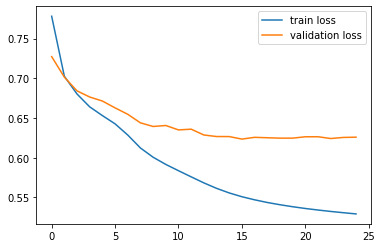

In [32]:
plt.plot(recommender.history["loss"], label="train loss")
plt.plot(recommender.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

In [33]:
recommender.history["val_loss"][-1]

0.62579745054245

In [34]:
print("RMSE: {}".format(str(np.sqrt(0.62579745054245))))

RMSE: 0.7910736062734302
